In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
%matplotlib inline

## Data processing

In [2]:
glob.glob("../../datasets/*bot2bot.tsv")

['../../datasets/enwiki_20161201_reverted_bot2bot.tsv',
 '../../datasets/zhwiki_20161001_reverted_bot2bot.tsv',
 '../../datasets/ptwiki_20161001_reverted_bot2bot.tsv',
 '../../datasets/frwiki_20161001_reverted_bot2bot.tsv',
 '../../datasets/jawiki_20161001_reverted_bot2bot.tsv',
 '../../datasets/dewiki_20161001_reverted_bot2bot.tsv',
 '../../datasets/eswiki_20161001_reverted_bot2bot.tsv']

In [3]:
df_dict = {}
for filename in glob.glob("../../datasets/*bot2bot.tsv"):
    lang_code = filename[15:17]
    df_dict[lang_code] = pd.read_csv(filename, sep="\t")

In [4]:
for lang, lang_df in df_dict.items():
    print(lang, len(lang_df))

en 1001093
zh 102846
pt 141738
fr 193066
ja 89980
de 137844
es 177368


In [5]:
df_dict['en'][0:2].transpose()

,0,1
rev_id,273691771,136526894
rev_timestamp,20090227173507,20070607044209
rev_user,6505923,4534303
rev_user_text,Kbdankbot,PbBot
rev_page,5040439,3046554
rev_sha1,qj45ne2z4yfexmpaz5wfnbm2yrmqt4j,3xtnw7u4w9h6cg1smw97mqnr1en6a55
rev_minor_edit,False,False
rev_deleted,False,False
rev_parent_id,2.59117e+08,1.20932e+08
archived,False,False


### Combining into one dataframe

In [6]:
df_all = df_dict['en'].copy()
df_all = df_all.drop(df_all.index, axis=0)

for lang, lang_df in df_dict.items():
    lang_df['language'] = lang
    df_all = pd.concat([df_all, lang_df])

In [7]:
df_all['language'].value_counts()

en    1001093
fr     193066
es     177368
pt     141738
de     137844
zh     102846
ja      89980
Name: language, dtype: int64

In [8]:
for lang, lang_df in df_dict.items():
    print(lang, len(lang_df))
    


en 1001093
zh 102846
pt 141738
fr 193066
ja 89980
de 137844
es 177368


### Namespace type

In [9]:
def namespace_type(item):
    if int(item) == 0:
        return 'article'
    elif int(item) == 14:
        return 'category'
    elif int(item) % 2 == 1:
        return 'other talk'
    else:
        return 'other page'

In [10]:
df_all['namespace_type'] = df_all['page_namespace'].apply(namespace_type)

In [11]:
df_all['namespace_type'].value_counts()

article       1122392
category       365193
other page     226994
other talk     129356
Name: namespace_type, dtype: int64

### Datetime parsing

In [12]:
def get_year(timestamp):
    return timestamp.year

In [13]:
df_all['reverting_timestamp_dt'] = pd.to_datetime(df_all['reverting_timestamp'], format="%Y%m%d%H%M%S")
df_all['reverted_timestamp_dt'] = pd.to_datetime(df_all['rev_timestamp'], format="%Y%m%d%H%M%S")

df_all = df_all.set_index('reverting_timestamp_dt')

df_all['reverting_timestamp_dt'] = pd.to_datetime(df_all['reverting_timestamp'], format="%Y%m%d%H%M%S")

df_all['time_to_revert'] = df_all['reverting_timestamp_dt']-df_all['reverted_timestamp_dt']

df_all['time_to_revert_hrs'] = df_all['time_to_revert'].astype('timedelta64[s]')/(60*60)

df_all['time_to_revert_days'] = df_all['time_to_revert'].astype('timedelta64[s]')/(60*60*24)

df_all['reverting_year'] = df_all['reverting_timestamp_dt'].apply(get_year)

In [14]:
df_all[df_all['language']=='en'].reverting_year.value_counts().sort_index()

2004         4
2005       262
2006      6238
2007     34084
2008     66228
2009     72846
2010     61780
2011    126814
2012     96084
2013    403111
2014     41188
2015     49194
2016     43260
Name: reverting_year, dtype: int64

In [15]:
df_all.reverting_year.value_counts().sort_index()

2004       604
2005      3196
2006     12714
2007     58850
2008    109978
2009    163096
2010    137000
2011    294004
2012    206238
2013    685235
2014     53466
2015     70826
2016     48728
Name: reverting_year, dtype: int64

### Final data format

In [16]:
df_all[0:2].transpose()

reverting_timestamp_dt,2009-02-28 02:19:25,2009-02-10 23:03:37
archived,False,False
language,en,en
page_namespace,0,1
rev_deleted,False,False
rev_id,273691771,136526894
rev_minor_edit,False,False
rev_page,5040439,3046554
rev_parent_id,2.59117e+08,1.20932e+08
rev_revert_offset,1,1
rev_sha1,qj45ne2z4yfexmpaz5wfnbm2yrmqt4j,3xtnw7u4w9h6cg1smw97mqnr1en6a55


# Comments analysis

In [17]:
# by http://stackoverflow.com/questions/14596884/remove-text-between-and-in-python

def remove_brackets(test_str):
    test_str = str(test_str)
    ret = ''
    skip1c = 0
    skip2c = 0
    for i in test_str:
        if i == '[':
            skip1c += 1
        elif i == '(':
            skip2c += 1
        elif i == ']' and skip1c > 0:
            skip1c -= 1
        elif i == ')'and skip2c > 0:
            skip2c -= 1
        elif skip1c == 0 and skip2c == 0:
            ret += i
            
    return " ".join(ret.split())

In [18]:
df_all['reverting_comment_nobracket'] = df_all['reverting_comment'].apply(remove_brackets)

### Check for having a language code in between punctuation

In [19]:
def interwiki_confirm(comment):
    """
    Takes a comment string, searches for language codes bordered by 
    two punctuation marks from [](){},: or one punctuation mark and
    one space. Beginning and end of a comment string counts as a
    space, not a punctuation mark.
    """
    import string, re
    
    with open("lang_codes.tsv", "r") as f:
        lang_codes = f.read().split("\n")
        
    lang_codes.pop() # a blank '' is in the list that gets returned
    
    try:
        comment = str(comment)
        comment = comment.lower()
        comment = " " + comment + " "  # pad start and end of string with non-punctuation
        
    except Exception as e:
        return 'other'
    
    for lang_code in lang_codes:
        
        lang_code_pos = comment.find(lang_code)
        lang_code_len = len(lang_code)
        
        char_before = " "
        char_after = " "
        
        if lang_code_pos >= 0:
            char_before = comment[lang_code_pos-1]
        
            #print("Char before: '", char_before, "'", sep='')
             
            char_after = comment[lang_code_pos+lang_code_len]

            #print("Char after: '", char_after, "'", sep='')
            
            if char_before in string.punctuation and char_after in "[]{}(),:":
                #print(lang_code)
                return 'interwiki link cleanup -- suspected'
            
            elif char_before in string.punctuation and char_after == "[]{}(),:":
                #print(lang_code)
                return 'interwiki link cleanup -- suspected'
            
            elif char_before == " " and char_after in "[]{}(),:":
                #print(lang_code)
                return 'interwiki link cleanup -- suspected'


               
    return 'other'
    

Testing interwiki confirm

In [20]:
tests_yes = ["Robot adding [[es:Test]]", "adding es:Test", "linking es, it, en"]
tests_no = ["test", "discuss policies on enwiki vs eswiki", "it is done", "it's not its", "its not it's"]

print("Should return interwiki link cleanup -- suspected")
for test in tests_yes:
    print("\t", interwiki_confirm(test))

print("Should return other")
for test in tests_no:
    print("\t", interwiki_confirm(test))

Should return interwiki link cleanup -- suspected
	 interwiki link cleanup -- suspected
	 interwiki link cleanup -- suspected
	 interwiki link cleanup -- suspected
Should return other
	 other
	 other
	 other
	 other
	 other


Comment parser

In [21]:
def comment_categorization(row):
    """
    Takes a row from a pandas dataframe or dict and returns a string with a
    kind of activity based on metadata. Used with df.apply(). Mostly parses
    comments, but makes some use of usernames too.
    """
    
    reverting_user = str(row['reverting_user_text'])
    
    
    if reverting_user.find("HBC AIV") >= 0:
        return 'AIV helperbot'
    
    try:
        comment = str(row['reverting_comment'])
    except Exception as e:
        return 'other'
    
    comment_lower = comment.lower().strip()
    comment_lower = " ".join(comment_lower.split())
 
    if comment == 'nan':
        return "deleted revision"
    
    elif comment.find("Undoing massive unnecessary addition of infoboxneeded by a (now blocked) bot") >= 0:
        return "botfight: infoboxneeded"
    
    elif comment_lower.find("commonsdelinker") >=0 and reverting_user.find("CommonsDelinker") == -1:
        return "botfight: reverting CommonsDelinker"
        
    elif comment.find("Reverted edits by [[Special:Contributions/ImageRemovalBot") >= 0:
        return "botfight: 718bot vs ImageRemovalBot"
    
    elif comment_lower.find("double redirect") >= 0:
        return "fixing double redirect"
    
    elif comment_lower.find("double-redirect") >= 0:
        return "fixing double redirect"

    elif comment_lower.find("has been moved; it now redirects to") >= 0:
        return "fixing double redirect"
        
    elif comment_lower.find("redirect tagging") >= 0:
        return "redirect tagging/sorting"
    
    elif comment_lower.find("sorting redirect") >= 0:
        return "redirect tagging/sorting"
    
    elif comment_lower.find("change redirected category") >= 0:
        return "category redirect cleanup"
    
    elif comment_lower.find("redirected category") >=0:
        return "category redirect cleanup"
    
    elif comment.find("[[User:Addbot|Bot:]] Adding ") >= 0:
        return "template tagging"
    
    elif comment_lower.find("interwiki") >= 0:
        return "interwiki link cleanup"
    
    elif comment_lower.find("langlinks") >= 0:
        return "interwiki link cleanup"
    
    elif comment_lower.find("iw-link") >= 0:
        return "interwiki link cleanup"
    
    elif comment_lower.find("changing category") >= 0:
        return "moving category"
    
    elif comment_lower.find("recat per") >= 0:
        return "moving category"
    
    elif comment_lower.find("moving category") >= 0:
        return "moving category"
    
    elif comment_lower.find("re-categorisation") >= 0:
        return "moving category"
    
    elif comment_lower.find("removing a protection template") >= 0:
        return "protection template cleanup"
    
    elif comment_lower.find("removing categorization template") >= 0:
        return "template cleanup"    
    
    elif comment_lower.find("rm ibid template per") >= 0:
        return "template cleanup"      
    
    elif comment_lower.find("page is not protected") >= 0:
        return "template cleanup"          
    
    elif comment_lower.find("removing protection template") >= 0:
        return "template cleanup"      
    
    elif comment_lower.find("removing orphan t") >= 0:
        return "orphan template cleanup"
    
    elif comment_lower.find("non-applicable orphan") >= 0:
        return "orphan template cleanup"
    
    elif comment_lower.find("removed orphan t") >= 0:
        return "orphan template cleanup"    
    
    elif comment_lower.find("sandbox") >= 0:
        return "clearing sandbox"
    
    elif comment_lower.find("archiving") >= 0:
        return "archiving"
    
    elif comment_lower.find("duplicate on commons") >= 0:
        return "commons image migration"
    
    elif comment_lower.find("user:mathbot/changes to mathlists") >= 0:
        return "mathbot mathlist updates"
        
    elif comment_lower.find("link syntax") >= 0:
        return "link syntax fixing"
    
    elif comment_lower.find("links syntax") >= 0:
        return "link syntax fixing" 
    
    elif comment_lower.find(" per") >= 0:
        return "other w/ per justification"  
    
    elif comment_lower.find("revert") >= 0:
        return "other w/ revert in comment"  
    
    elif comment_lower.find("rv ") >= 0 or comment_lower.find("rv") == 0:
        return "other w/ revert in comment"  
    
    elif comment_lower.find("wikidata") >= 0:
        return "interwiki link cleanup -- suspected"
    
    elif comment.find("言語間") >=0:
        return "interwiki"
    
    elif comment.find("语言链接") >=0:
        return "interwiki"  
    
    elif comment.find("双重重定向") >=0:
        return "double redirect"  

    elif comment.find("二重リダイレクト") >=0:
        return "double redirect"  

    
    else:
        return interwiki_confirm(comment)

Apply categorization

In [22]:
df_all['bottype'] = df_all.apply(comment_categorization, axis=1)


## Analysis

In [53]:
df_all_ns0 = df_all[df_all['page_namespace']==0]

In [54]:
type_counts = df_all_ns0['bottype'].value_counts().rename("count")
type_percent = df_all_ns0['bottype'].value_counts(normalize=True).rename("percent") * 100
type_percent = type_percent.round(2).astype(str) + "%"

pd.concat([type_counts, type_percent], axis=1)

,count,percent
interwiki link cleanup -- suspected,546600,48.7%
fixing double redirect,227592,20.28%
interwiki link cleanup,226598,20.19%
other,53646,4.78%
interwiki,38878,3.46%
protection template cleanup,5686,0.51%
other w/ revert in comment,4852,0.43%
moving category,4692,0.42%
double redirect,4008,0.36%
category redirect cleanup,2834,0.25%


In [55]:
counts_dict = {}
for lang in df_all_ns0['language'].unique():

    df_lang_ns0 = df_all_ns0[df_all_ns0['language']==lang]
    
    type_counts = df_lang_ns0['bottype'].value_counts().rename("count")
    type_percent = df_lang_ns0['bottype'].value_counts(normalize=True).rename("percent") * 100
    type_percent = type_percent.round(2).astype(str) + "%"

    counts_dict[lang]=pd.concat([type_counts, type_percent], axis=1)

In [56]:
df_all_ns0['language'].unique()

array(['en', 'zh', 'pt', 'fr', 'ja', 'de', 'es'], dtype=object)

In [60]:
counts_dict['en']

,count,percent
fixing double redirect,220172,45.04%
interwiki link cleanup,165388,33.84%
interwiki link cleanup -- suspected,77020,15.76%
protection template cleanup,5674,1.16%
other,5040,1.03%
moving category,4672,0.96%
category redirect cleanup,2824,0.58%
orphan template cleanup,2054,0.42%
other w/ revert in comment,2014,0.41%
mathbot mathlist updates,1028,0.21%


In [61]:
counts_dict['ja']

,count,percent
interwiki link cleanup -- suspected,56070,81.02%
interwiki,10056,14.53%
other,2358,3.41%
double redirect,588,0.85%
other w/ per justification,82,0.12%
interwiki link cleanup,30,0.04%
other w/ revert in comment,24,0.03%


In [62]:
counts_dict['zh']

,count,percent
interwiki link cleanup -- suspected,48192,56.02%
interwiki,28822,33.5%
other,4552,5.29%
double redirect,3420,3.98%
other w/ revert in comment,514,0.6%
interwiki link cleanup,400,0.46%
other w/ per justification,72,0.08%
fixing double redirect,52,0.06%
botfight: reverting CommonsDelinker,6,0.01%


In [63]:
counts_dict['de']

,count,percent
interwiki link cleanup -- suspected,71170,64.81%
interwiki link cleanup,33118,30.16%
other,5238,4.77%
other w/ per justification,178,0.16%
other w/ revert in comment,44,0.04%
moving category,20,0.02%
protection template cleanup,12,0.01%
botfight: reverting CommonsDelinker,10,0.01%
category redirect cleanup,10,0.01%
orphan template cleanup,8,0.01%


In [64]:
counts_dict['fr']

,count,percent
interwiki link cleanup -- suspected,101752,90.44%
fixing double redirect,6568,5.84%
other,3898,3.46%
other w/ per justification,168,0.15%
interwiki link cleanup,110,0.1%
other w/ revert in comment,6,0.01%
clearing sandbox,4,0.0%
botfight: reverting CommonsDelinker,4,0.0%


In [65]:
counts_dict['pt']

,count,percent
interwiki link cleanup -- suspected,85318,71.06%
interwiki link cleanup,27256,22.7%
other,7300,6.08%
other w/ per justification,140,0.12%
other w/ revert in comment,52,0.04%
clearing sandbox,2,0.0%
botfight: reverting CommonsDelinker,2,0.0%


In [66]:
counts_dict['es']

,count,percent
interwiki link cleanup -- suspected,107078,78.76%
other,25260,18.58%
other w/ revert in comment,2198,1.62%
fixing double redirect,794,0.58%
other w/ per justification,300,0.22%
interwiki link cleanup,296,0.22%
botfight: reverting CommonsDelinker,32,0.02%
clearing sandbox,2,0.0%


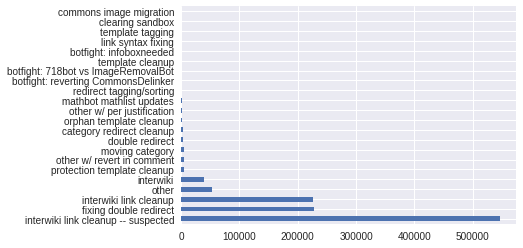

In [28]:
df_all_ns0['bottype'].value_counts().plot(kind='barh')

In [29]:
gp = df.groupby([pd.TimeGrouper('1D', closed='left'), 'bottype'])

NameError: name 'df' is not defined

In [ ]:
ax1 = gp.rev_id.count().unstack().plot(kind='area', subplots=True, figsize=[12,40], sharex=False)

In [59]:
df_lang_ns0 = df_all_ns0[df_all_ns0['language']=='zh']

other_count = 0
for comment, count in df_lang_ns0[df_lang_ns0['bottype']=='other']['reverting_comment_nobracket'].value_counts().iteritems():
    if count > 10:
        print(count, "\t", comment)
    else:
        other_count = other_count + count
print(other_count, "\tOther cases")

2250 	 機器人:修正雙重重定向 →
1534 	 機器人:修正雙重重定向
80 	 機器人 移除:
62 	 r2.7.1)
48 	 robot Adding:
44 	 r2.7.2)
36 	 robot Removing:
28 	 r2.7.3)
24 	 机器人移除：
22 	 机器人去除：
16 	 robot Modifying: en
14 	 机器人：改变已重定向分类中的页面的分类
12 	 /* 参考文献 */维基化 using
12 	 機器人:修正雙重重定向 ->
12 	 机器人:
358 	Other cases
